# Day 4: EDA

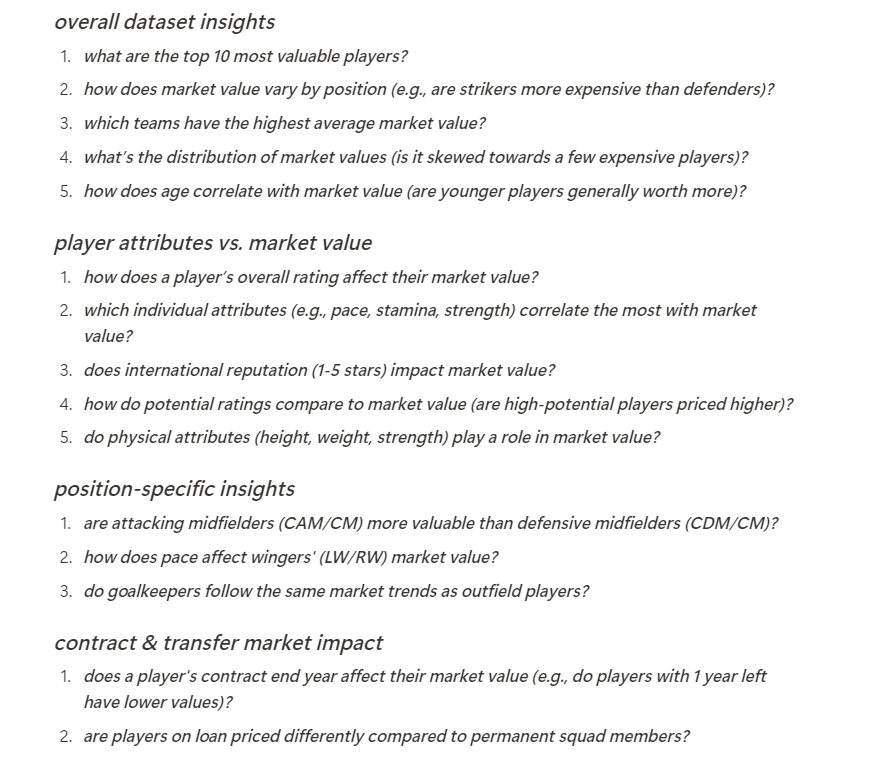

Let's GET started before diving into finding patterns. 

> **Note:** This EDA will primarily focus on market value analysis rather than individual player analysis.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("../data/processed/cleaned_data.csv")

In [11]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential  Growth   foot                      Team       Value      Wage  \
0         84    12.0  Right                     Genoa   5500000.0   27000.0   
1         86    10.0  Right      RC Strasbourg Alsace  16500000.0   64000.0   
2         85    10.0  Right           Atlético Madrid  12500000.0   36000.0   
3         82    20.0  Right  St Patrick's Athletic FC   1100000.0    2000.0   
4         89     NaN  Right           Manchester City  63500000.0  270000.0   

   Release clause  Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  \
0      11000000.0        191         75            65            69     62.0   
1             NaN        180         75            77            73     77.0   
2      28800000.0        173         75            84            85     82.0   
3       2800000.0        185         78            74            74     73.0   
4     117500000.0        181         75            67            67     75.0   

   Reactions  Balance  Stamina  Strength  Jumping  Total attacking  Crossing  \
0         70     54.0       66        75     79.0              267        59   
1         72     69.0       77        75     87.0              333        56   
2         76     82.0       78        79     86.0              341        63   
3         54     77.0       68        65     70.0              277        51   
4         92     78.0       76        75     71.0              411        95   

   Finishing  Heading accuracy  Short passing  Volleys  Total skill  \
0         29                72             66     41.0          282   
1         67                78             79     53.0          352   
2         75                69             72     62.0          313   
3         61                57             56     52.0          274   
4         84                55             94     83.0          447   

   Dribbling  Curve  FK Accuracy  Long passing  Ball control  Total defending  \
0         66   51.0           34            64            67              219   
1         77   68.0           52            77            78              227   
2         76   56.0           46            60            75               62   
3         63   54.0           51            43            63               68   
4         86   93.0           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5       

In [12]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)


In [13]:
df.head(5)

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential  Growth   foot                      Team       Value      Wage  \
0         84    12.0  Right                     Genoa   5500000.0   27000.0   
1         86    10.0  Right      RC Strasbourg Alsace  16500000.0   64000.0   
2         85    10.0  Right           Atlético Madrid  12500000.0   36000.0   
3         82    20.0  Right  St Patrick's Athletic FC   1100000.0    2000.0   
4         89     NaN  Right           Manchester City  63500000.0  270000.0   

   Release clause  Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  \
0      11000000.0        191         75            65            69     62.0   
1             NaN        180         75            77            73     77.0   
2      28800000.0        173         75            84            85     82.0   
3       2800000.0        185         78            74            74     73.0   
4     117500000.0        181         75            67            67     75.0   

   Reactions  Balance  Stamina  Strength  Jumping  Total attacking  Crossing  \
0         70     54.0       66        75     79.0              267        59   
1         72     69.0       77        75     87.0              333        56   
2         76     82.0       78        79     86.0              341        63   
3         54     77.0       68        65     70.0              277        51   
4         92     78.0       76        75     71.0              411        95   

   Finishing  Heading accuracy  Short passing  Volleys  Total skill  \
0         29                72             66     41.0          282   
1         67                78             79     53.0          352   
2         75                69             72     62.0          313   
3         61                57             56     52.0          274   
4         84                55             94     83.0          447   

   Dribbling  Curve  FK Accuracy  Long passing  Ball control  Total defending  \
0         66   51.0           34            64            67              219   
1         77   68.0           52            77            78              227   
2         76   56.0           46            60            75               62   
3         63   54.0           51            43            63               68   
4         86   93.0           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5       

In [28]:
df.describe()

ID          Age  Best overall  Overall rating    Potential  \
count    4908.000000  4908.000000   4908.000000     4908.000000  4908.000000   
mean   239914.306438    24.339038     71.785860       70.621638    76.672372   
std     44022.572576     4.731379      6.973471        7.146526     5.722920   
min        41.000000    16.000000     50.000000       47.000000    48.000000   
25%    228926.000000    21.000000     67.000000       66.000000    73.000000   
50%    255270.000000    23.000000     72.000000       71.000000    77.000000   
75%    266449.250000    27.000000     77.000000       76.000000    81.000000   
max    279929.000000    54.000000     92.000000       91.000000    94.000000   

            Growth         Value           Wage  Release clause    Height_cm  \
count  3623.000000  4.822000e+03    4832.000000    4.308000e+03  4908.000000   
mean      8.196798  7.773326e+06   26652.204056    1.556057e+07   181.839038   
std       4.835125  1.363132e+07   33929.767463    2.742322e+07     6.974156   
min       1.000000  1.000000e+03     500.000000    2.300000e+04   158.000000   
25%       4.000000  1.300000e+06    7000.000000    2.300000e+06   177.000000   
50%       8.000000  2.800000e+06   15000.000000    5.500000e+06   182.000000   
75%      11.000000  8.000000e+06   33000.000000    1.620000e+07   187.000000   
max      25.000000  1.745000e+08  440000.000000    3.708000e+08   206.000000   

         Weight_kg  Acceleration  Sprint speed      Agility    Reactions  \
count  4908.000000   4908.000000   4908.000000  4905.000000  4908.000000   
mean     75.024450     68.885289     68.968011    67.681346    67.314792   
std       7.117247     14.151488     13.918479    14.018769     9.125494   
min      53.000000     15.000000     15.000000    20.000000    30.000000   
25%      70.000000     63.000000     63.000000    60.000000    61.000000   
50%      75.000000     71.000000     71.000000    70.000000    68.000000   
75%      80.000000     79.000000     78.000000    78.000000    74.000000   
max     103.000000     97.000000     97.000000    95.000000    94.000000   

           Balance      Stamina     Strength      Jumping  Total attacking  \
count  4905.000000  4908.000000  4908.000000  4905.000000      4908.000000   
mean     66.997554    65.995721    66.176243    69.389399       279.513855   
std      14.142885    14.885165    12.640348    11.596519        71.560706   
min      20.000000    15.000000    27.000000    25.000000        46.000000   
25%      59.000000    60.000000    58.000000    62.000000       252.000000   
50%      69.000000    68.000000    67.000000    71.000000       291.000000   
75%      77.000000    76.000000    75.000000    78.000000       325.000000   
max      95.000000    95.000000    95.000000    95.000000       441.000000   

          Crossing    Finishing  Heading accuracy  Short passing      Volleys  \
count  4908.000000  4908.000000       4908.000000    4908.000000  4905.000000   
mean     55.562551    53.124287         56.177262      65.805420    48.874210   
std      17.697201    19.933025         16.904603      12.845313    18.391094   
min       8.000000     4.000000          6.000000      15.000000     4.000000   
25%      46.000000    40.000000         48.000000      61.000000    36.000000   
50%      59.000000    58.000000         59.000000      68.000000    51.000000   
75%      68.000000    68.000000         68.000000      74.000000    63.000000   
max      95.000000    96.000000         93.000000      94.000000    92.000000   

       Total skill    Dribbling        Curve  FK Accuracy  Long passing  \
count  4908.000000  4908.000000  4905.000000  4908.000000   4908.000000   
mean    293.042584    63.709454    55.330479    47.938468     60.027302   
std      74.625557    17.446566    18.086046    17.468149     13.860894   
min      52.000000     5.000000     8.000000     7.000000     13.000000   
25%     261.000000    59.000000    45.000000    36.000000     52.000000   
50%     

# Performing Analysis

In [34]:
# value counts for players
print(df['Best position'].value_counts())
print(df['foot'].value_counts())
print(df['Team'].value_counts())


Best position
CAM    912
CB     892
ST     775
CM     357
GK     356
RM     349
CDM    322
LM     225
RB     222
LB     215
RWB     78
LWB     76
RW      56
LW      54
CF      19
Name: count, dtype: int64
foot
Right    3587
Left     1321
Name: count, dtype: int64
Team
Chelsea                                 40
AC Milan                                33
FC Barcelona                            33
Manchester City                         32
Manchester United                       32
Newcastle United                        31
Paris Saint-Germain                     31
Aston Villa                             30
Southampton                             30
Arsenal                                 30
Tottenham Hotspur                       29
Sporting CP                             29
Inter                                   29
Como                                    29
AS Monaco                               29
Burnley                                 28
Atlético Madrid                         28


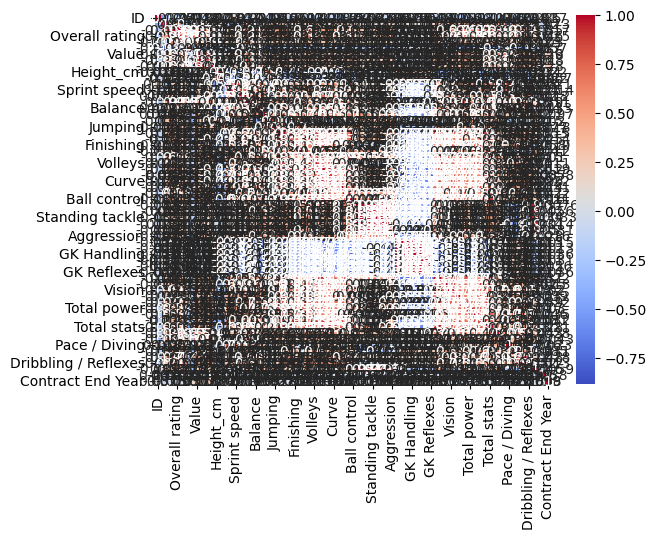

In [36]:
# correlation matrix
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [38]:
df.head(5)

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential  Growth   foot                      Team       Value      Wage  \
0         84    12.0  Right                     Genoa   5500000.0   27000.0   
1         86    10.0  Right      RC Strasbourg Alsace  16500000.0   64000.0   
2         85    10.0  Right           Atlético Madrid  12500000.0   36000.0   
3         82    20.0  Right  St Patrick's Athletic FC   1100000.0    2000.0   
4         89     NaN  Right           Manchester City  63500000.0  270000.0   

   Release clause  Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  \
0      11000000.0        191         75            65            69     62.0   
1             NaN        180         75            77            73     77.0   
2      28800000.0        173         75            84            85     82.0   
3       2800000.0        185         78            74            74     73.0   
4     117500000.0        181         75            67            67     75.0   

   Reactions  Balance  Stamina  Strength  Jumping  Total attacking  Crossing  \
0         70     54.0       66        75     79.0              267        59   
1         72     69.0       77        75     87.0              333        56   
2         76     82.0       78        79     86.0              341        63   
3         54     77.0       68        65     70.0              277        51   
4         92     78.0       76        75     71.0              411        95   

   Finishing  Heading accuracy  Short passing  Volleys  Total skill  \
0         29                72             66     41.0          282   
1         67                78             79     53.0          352   
2         75                69             72     62.0          313   
3         61                57             56     52.0          274   
4         84                55             94     83.0          447   

   Dribbling  Curve  FK Accuracy  Long passing  Ball control  Total defending  \
0         66   51.0           34            64            67              219   
1         77   68.0           52            77            78              227   
2         76   56.0           46            60            75               62   
3         63   54.0           51            43            63               68   
4         86   93.0           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5       

In [42]:
df[df['Name'].str.contains('Lamine Yamal', case=False, na=False)]

Name      ID  Age Best position  Best overall  Overall rating  \
28  Lamine Yamal  277643   16           CAM            86              84   

    Potential  Growth  foot          Team       Value     Wage  \
28         94    10.0  Left  FC Barcelona  87000000.0  95000.0   

    Release clause  Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  \
28     195800000.0        180         72            86            83     88.0   

    Reactions  Balance  Stamina  Strength  Jumping  Total attacking  Crossing  \
28         80     77.0       57        45     57.0              344        83   

    Finishing  Heading accuracy  Short passing  Volleys  Total skill  \
28         80                33             83     65.0          394   

    Dribbling  Curve  FK Accuracy  Long passing  Ball control  \
28         87   83.0           65            73            86   

    Total defending  Defensive awareness  Standing tackle  Sliding tackle  \
28               71                   23               20            28.0   

    Interceptions  Aggression  Total goalkeeping  GK Diving  GK Handling  \
28             18          45                 46          9           13   

    GK Kicking  GK Positioning  GK Reflexes  Total mentality  Att. Position  \
28         7.0              10            7              294             80   

    Vision  Penalties  Composure  Total power  Shot power  Long shots  \
28    82.0       69.0       75.0          319          80          80   

    Total stats  Base stats  International reputation  Pace / Diving  \
28         1882         400                         3             84   

    Shooting / Handling  Passing / Kicking  Dribbling / Reflexes  \
28                   79                 80                    85   

    Defending / Pace  On Loan  Contract End Year  
28                23        0               2026

market value: fluctates based on player form, performance, transfer rumors (We have growth/ potential to determine) <br>
wage: means salary for a player 

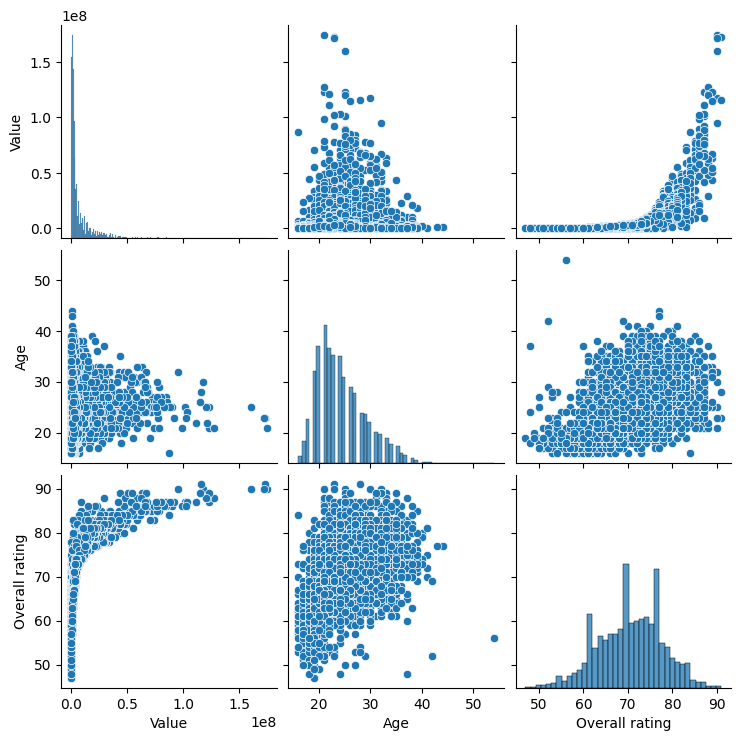

In [40]:
# pairplot
sns.pairplot(df[['Value', 'Age', 'Overall rating','Best position']])
plt.show()


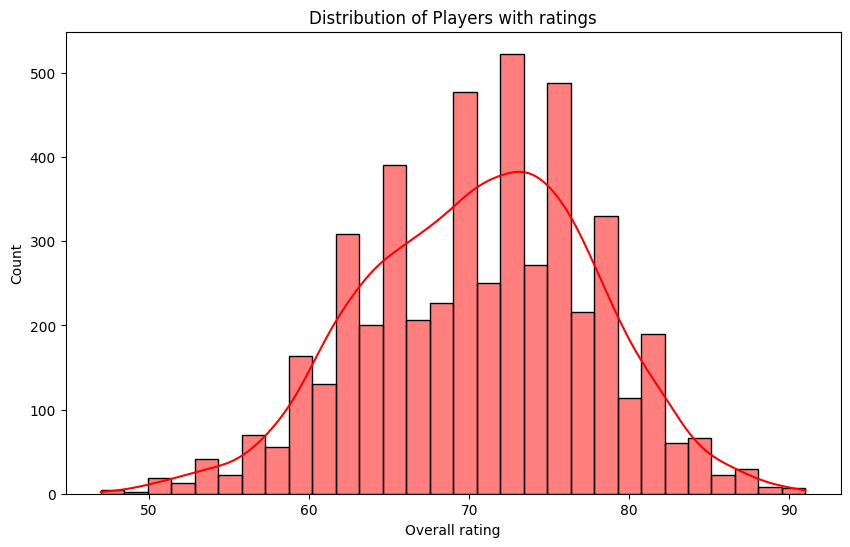

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['Overall rating'], bins=30, kde=True, color='red')
plt.title('Distribution of Players with ratings')
plt.show()

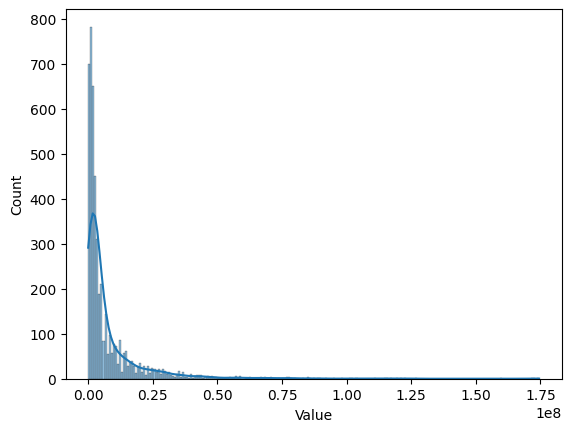

In [44]:
# distribution of market values
sns.histplot(df['Value'], kde=True)
plt.show()


we can see the left skewed distribution here. we can apply log transofrmation for better visualizeiton<br>
This makes values like €100M and €1M less extreme by applying a logarithmic scale, improving analysis or prediction accuracy.

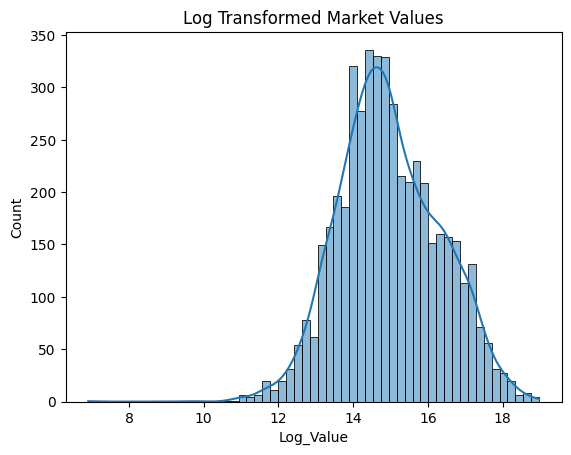

In [54]:
df['Log_Value'] = df['Value'].apply(lambda x: np.log(x + 1))

# Plot the transformed values
sns.histplot(df['Log_Value'], kde=True)
plt.title('Log Transformed Market Values')
plt.show()

In [52]:
print(f"Original Value Skewness: {df['Value'].skew()}")
print(f"Log-Transformed Value Skewness: {df['Log_Value'].skew()}")


Original Value Skewness: 4.597497391640311
Log-Transformed Value Skewness: 0.09377053514564641


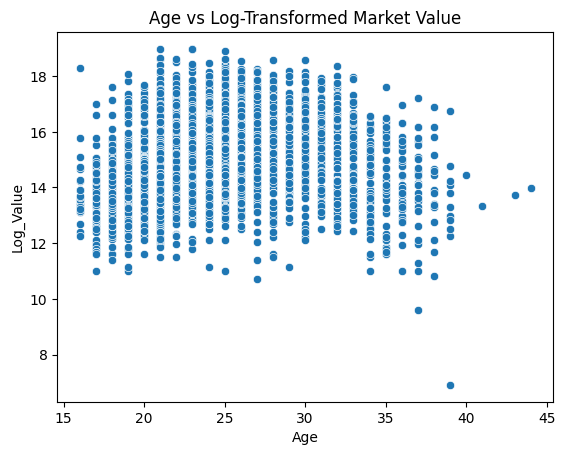

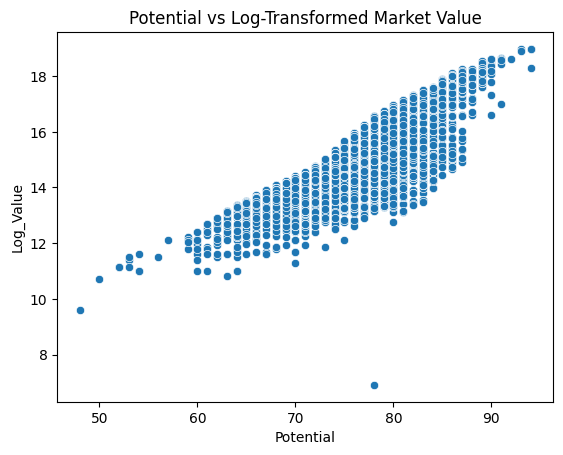

In [51]:
sns.scatterplot(x=df['Age'], y=df['Log_Value'])
plt.title('Age vs Log-Transformed Market Value')
plt.show()

sns.scatterplot(x=df['Potential'], y=df['Log_Value'])
plt.title('Potential vs Log-Transformed Market Value')
plt.show()


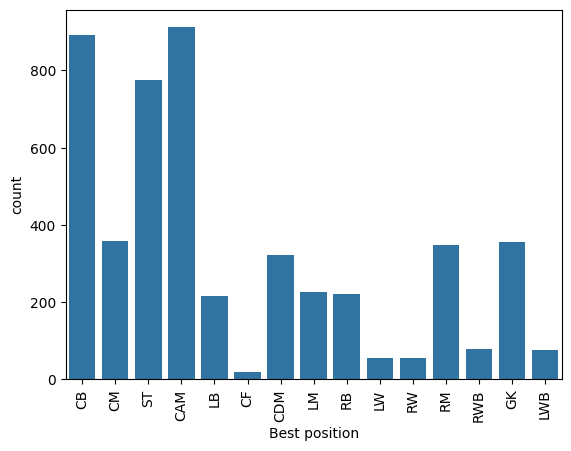

In [55]:
# bar plot for Best position distribution
sns.countplot(x='Best position', data=df)
plt.xticks(rotation=90)
plt.show()


>As my goal is to predict the market value of players, I will be focusing on the following observations and then documenting each finding during my analysis:

1. Market Value by positions:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'CB'),
  Text(1, 0, 'CM'),
  Text(2, 0, 'ST'),
  Text(3, 0, 'CAM'),
  Text(4, 0, 'LB'),
  Text(5, 0, 'CF'),
  Text(6, 0, 'CDM'),
  Text(7, 0, 'LM'),
  Text(8, 0, 'RB'),
  Text(9, 0, 'LW'),
  Text(10, 0, 'RW'),
  Text(11, 0, 'RM'),
  Text(12, 0, 'RWB'),
  Text(13, 0, 'GK'),
  Text(14, 0, 'LWB')])

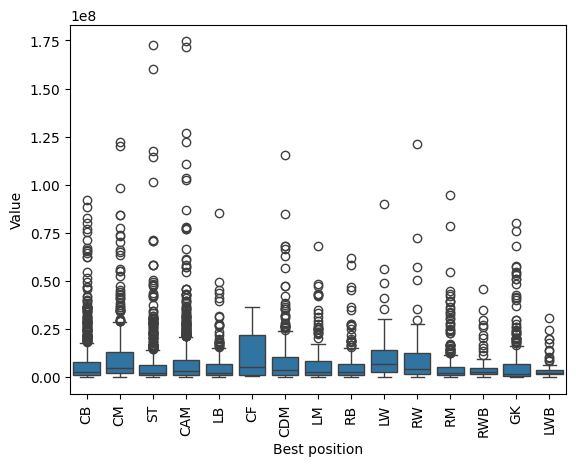

In [60]:
sns.boxplot(x='Best position', y='Value', data=df)
plt.xticks(rotation=90)

conclusion: Positions like attackers (e.g., ST) might have higher market values, while defenders (e.g., CB) might have lower values.

2. Market Value Vs Potential

<Axes: xlabel='Potential', ylabel='Value'>

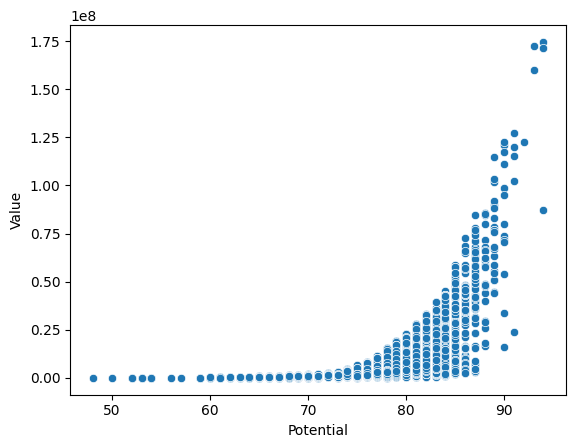

In [62]:
sns.scatterplot(x='Potential', y='Value', data=df)

In [68]:
import plotly.express as px

# Assuming 'Log_Value' is the log-transformed market value
fig = px.scatter_3d(df, x='Age', y='Potential', z='Value', 
                    color='Log_Value',  # Color by market value (log-transformed)
                    labels={'Age': 'Age', 'Potential': 'Potential', 'Log_Value': 'Log Market Value'},
                    title="3D Scatter Plot of Age, Potential, and Log Market Value")

fig.show()

3. Market Value and positions

In [72]:
# group by position and calculate mean value
df.groupby('Best position')['Value'].mean().sort_values(ascending=False)
.3

Best position
LW     1.282623e+07
RW     1.248236e+07
CF     1.181806e+07
CM     1.168246e+07
CDM    8.941497e+06
CAM    8.526430e+06
CB     7.437826e+06
LM     7.166480e+06
ST     7.016735e+06
GK     6.760242e+06
LB     6.363957e+06
RB     6.291500e+06
RM     5.908532e+06
RWB    5.865195e+06
LWB    4.447297e+06
Name: Value, dtype: float64

wingers market values seems higher 

In [80]:
import plotly.express as px
fig = px.scatter(df[df['Best position'].isin(['LW', 'RW'])], x='Pace / Diving', y='Value', 
                 title='Pace vs Market Value for Wingers', labels={'Pace / Diving': 'Pace', 'Value': 'Market Value'},
                 trendline='ols')  
fig.show()


> i think i have to create a list of questions with the help of copilot and try to extract the conclusion from them. This would be the perfect Visualizations as well as the perfect conlcusion

# **overall dataset insights**

### what are the **top 10 most valuable players**?

In [83]:
df.head(5)

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential  Growth   foot                      Team       Value      Wage  \
0         84    12.0  Right                     Genoa   5500000.0   27000.0   
1         86    10.0  Right      RC Strasbourg Alsace  16500000.0   64000.0   
2         85    10.0  Right           Atlético Madrid  12500000.0   36000.0   
3         82    20.0  Right  St Patrick's Athletic FC   1100000.0    2000.0   
4         89     NaN  Right           Manchester City  63500000.0  270000.0   

   Release clause  Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  \
0      11000000.0        191         75            65            69     62.0   
1             NaN        180         75            77            73     77.0   
2      28800000.0        173         75            84            85     82.0   
3       2800000.0        185         78            74            74     73.0   
4     117500000.0        181         75            67            67     75.0   

   Reactions  Balance  Stamina  Strength  Jumping  Total attacking  Crossing  \
0         70     54.0       66        75     79.0              267        59   
1         72     69.0       77        75     87.0              333        56   
2         76     82.0       78        79     86.0              341        63   
3         54     77.0       68        65     70.0              277        51   
4         92     78.0       76        75     71.0              411        95   

   Finishing  Heading accuracy  Short passing  Volleys  Total skill  \
0         29                72             66     41.0          282   
1         67                78             79     53.0          352   
2         75                69             72     62.0          313   
3         61                57             56     52.0          274   
4         84                55             94     83.0          447   

   Dribbling  Curve  FK Accuracy  Long passing  Ball control  Total defending  \
0         66   51.0           34            64            67              219   
1         77   68.0           52            77            78              227   
2         76   56.0           46            60            75               62   
3         63   54.0           51            43            63               68   
4         86   93.0           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5       

In [90]:
df.sort_values(by='Value', ascending=False).head(10)

Name      ID  Age Best position  Best overall  Overall rating  \
18   J. Bellingham  252371   21           CAM            92              90   
22      E. Haaland  239085   23            ST            92              91   
121       Vini Jr.  238794   23           CAM            91              90   
42       K. Mbappé  231747   25            ST            92              90   
43        F. Wirtz  256630   21           CAM            90              88   
110    M. Ødegaard  222665   25            CM            89              89   
25      J. Musiala  256790   21           CAM            89              87   
85         B. Saka  246669   22            RW            88              88   
132    F. Valverde  239053   25            CM            90              88   
92         H. Kane  202126   30            ST            90              90   

     Potential  Growth   foot                 Team        Value      Wage  \
18          94     4.0  Right          Real Madrid  174500000.0  280000.0   
22          93     2.0   Left      Manchester City  172500000.0  420000.0   
121         94     4.0  Right          Real Madrid  171500000.0  340000.0   
42          93     3.0  Right          Real Madrid  160000000.0  380000.0   
43          91     3.0  Right  Bayer 04 Leverkusen  127000000.0  115000.0   
110         90     1.0   Left              Arsenal  122500000.0  240000.0   
25          92     5.0  Right    FC Bayern München  122500000.0   87000.0   
85          90     2.0   Left              Arsenal  121000000.0  210000.0   
132         91     3.0  Right          Real Madrid  120000000.0  300000.0   
92          90     NaN  Right    FC Bayern München  117500000.0  170000.0   

     Release clause  Height_cm  Weight_kg  Acceleration  Sprint speed  \
18      370800000.0        186         75            81            80   
22      332100000.0        195         94            80            94   
121     364400000.0        176         73            95            95   
42      340000000.0        182         75            97            97   
43      219100000.0        177         71            81            81   
110     235800000.0        178         68            72            69   
25      211300000.0        184         72            87            83   
85      232900000.0        178         65            88            84   
132     255000000.0        182         78            84            91   
92      193900000.0        188         86            64            66   

     Agility  Reactions  Balance  Stamina  Strength  Jumping  Total attacking  \
18      82.0         91     79.0       93        77     84.0              396   
22      77.0         94     69.0       76        93     92.0              404   
121     94.0         86     84.0       84        65     74.0              376   
42      93.0         91     82.0       87        77     88.0              411   
43      87.0         88     87.0       87        59     64.0              378   
110     85.0         91     83.0       88        56     66.0              394   
25      94.0         89     93.0       78        59     79.0              384   
85      85.0         87     88.0       86        63     71.0              387   
132     77.0         89     68.0       92        82     83.0              381   
92      66.0         94     73.0       75        86     87.0              441   

     Crossing  Finishing  Heading accuracy  Short passing  Volleys  \
18         66         89                75             89     77.0   
22         58         96                83             77     90.0   
121        81         89                50             83     73.0   
42         78         92                72             85     84.0   
43         84         79                43             91     81.0   
110        86         83                55             91     79.0   
25         67         84                74             86     73.0   
85         89         85                

### how does **market value vary by position** (e.g., are strikers more expensive than defenders)?

In [102]:
fig = px.box(df, x='Best position', y='Value', 
             title="Market Value Distribution by Position",
             labels={'Best position': 'Player Position', 'Value': 'Market Value (€)'},
             color='Best position',
             points= 'all')  # Do not show individual points (outliers)

fig.show()


C:\Users\samir\AppData\Local\Temp\ipykernel_10448\3625967482.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




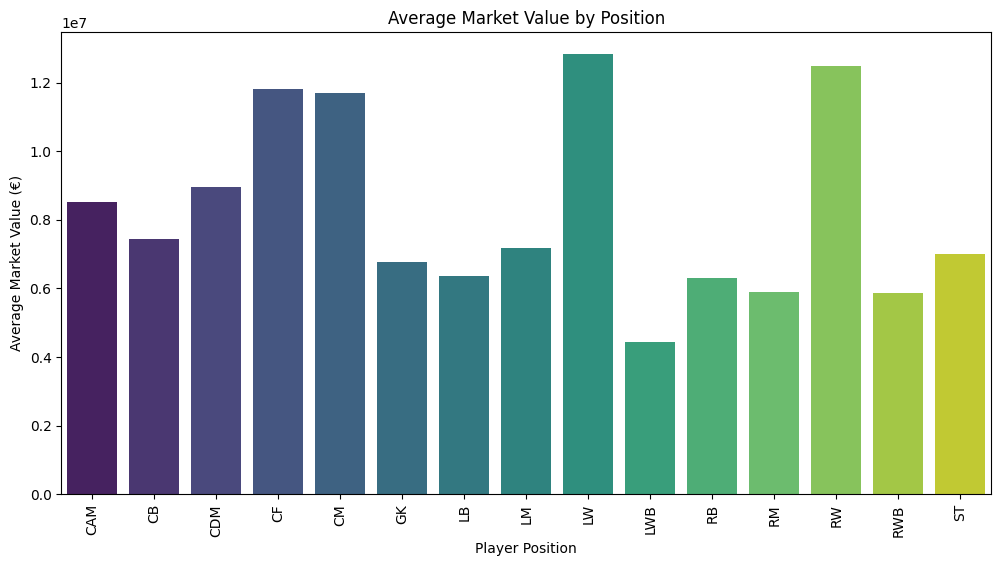

In [111]:
avg_value_by_position = df.groupby('Best position')['Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Best position', y='Value', data=avg_value_by_position, palette='viridis')
plt.title("Average Market Value by Position")
plt.xlabel("Player Position")
plt.ylabel("Average Market Value (€)")
plt.xticks(rotation=90)
plt.show()

### which teams have the **highest average market value**?

In [127]:
avg_value_by_team =  df.groupby('Team')['Value'].mean().sort_values(ascending=False)

In [123]:
fig = px.bar(avg_value_by_team, x=avg_value_by_team.index, y=avg_value_by_team.values, title='Average Market Value by Team', labels={'x': 'Team', 'y': 'Average Market Value (€)'}, color=avg_value_by_team.values, color_continuous_scale='viridis')
fig.show()

Team with highest average market value: Real Madrid with an average market value of 51M euro.

### what’s the **distribution of market values** (is it skewed towards a few expensive players)?

<Axes: xlabel='Value', ylabel='Count'>

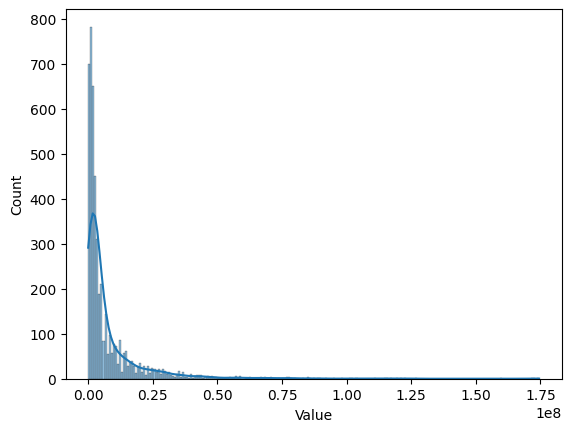

In [ ]:
sns.histplot(df['Value'], kde=True)

The distribution of market values is likely right-skewed, indicating that most players have lower market values, while a small group of expensive players

### how does **age correlate with market value** (are younger players generally worth more)?

In [137]:
df.head(5)

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential  Growth   foot                      Team       Value      Wage  \
0         84    12.0  Right                     Genoa   5500000.0   27000.0   
1         86    10.0  Right      RC Strasbourg Alsace  16500000.0   64000.0   
2         85    10.0  Right           Atlético Madrid  12500000.0   36000.0   
3         82    20.0  Right  St Patrick's Athletic FC   1100000.0    2000.0   
4         89     NaN  Right           Manchester City  63500000.0  270000.0   

   Release clause  Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  \
0      11000000.0        191         75            65            69     62.0   
1             NaN        180         75            77            73     77.0   
2      28800000.0        173         75            84            85     82.0   
3       2800000.0        185         78            74            74     73.0   
4     117500000.0        181         75            67            67     75.0   

   Reactions  Balance  Stamina  Strength  Jumping  Total attacking  Crossing  \
0         70     54.0       66        75     79.0              267        59   
1         72     69.0       77        75     87.0              333        56   
2         76     82.0       78        79     86.0              341        63   
3         54     77.0       68        65     70.0              277        51   
4         92     78.0       76        75     71.0              411        95   

   Finishing  Heading accuracy  Short passing  Volleys  Total skill  \
0         29                72             66     41.0          282   
1         67                78             79     53.0          352   
2         75                69             72     62.0          313   
3         61                57             56     52.0          274   
4         84                55             94     83.0          447   

   Dribbling  Curve  FK Accuracy  Long passing  Ball control  Total defending  \
0         66   51.0           34            64            67              219   
1         77   68.0           52            77            78              227   
2         76   56.0           46            60            75               62   
3         63   54.0           51            43            63               68   
4         86   93.0           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5       

In [143]:
import plotly.express as px

# Create a 3D scatter plot to visualize the correlation between age, market value, and potential
fig = px.scatter_3d(df, x='Age', y='Value', z='Potential',
                    title="Age vs Market Value vs Potential",
                    labels={'Age': 'Age (years)', 'Value': 'Market Value (€)', 'Potential': 'Potential Rating', 'Name': 'Name'}, 
                    color='Age')

fig.show()


Typically, younger players with higher potential tend to have higher market values, but as age increases, the market value might decrease unless they perform exceptionally well.

# **player attributes vs. market value**

### how does a player’s **overall rating affect their market value**?

In [149]:
fig = px.scatter(df, x='Overall rating', y='Value',
                 title="Overall Rating vs Market Value",
                 labels={'Overall rating': 'Overall Rating', 'Value': 'Market Value (€)'},
                 color='Age',
                 trendline='ols')  # Add a trendline    

fig.show()

players with higher overall ratings tend to have higher market values, though there may be exceptions based on age, potential, or market dynamics.

### which individual attributes (e.g., pace, stamina, strength) **correlate the most with market value**?

In [151]:
df.head(5)

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential  Growth   foot                      Team       Value      Wage  \
0         84    12.0  Right                     Genoa   5500000.0   27000.0   
1         86    10.0  Right      RC Strasbourg Alsace  16500000.0   64000.0   
2         85    10.0  Right           Atlético Madrid  12500000.0   36000.0   
3         82    20.0  Right  St Patrick's Athletic FC   1100000.0    2000.0   
4         89     NaN  Right           Manchester City  63500000.0  270000.0   

   Release clause  Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  \
0      11000000.0        191         75            65            69     62.0   
1             NaN        180         75            77            73     77.0   
2      28800000.0        173         75            84            85     82.0   
3       2800000.0        185         78            74            74     73.0   
4     117500000.0        181         75            67            67     75.0   

   Reactions  Balance  Stamina  Strength  Jumping  Total attacking  Crossing  \
0         70     54.0       66        75     79.0              267        59   
1         72     69.0       77        75     87.0              333        56   
2         76     82.0       78        79     86.0              341        63   
3         54     77.0       68        65     70.0              277        51   
4         92     78.0       76        75     71.0              411        95   

   Finishing  Heading accuracy  Short passing  Volleys  Total skill  \
0         29                72             66     41.0          282   
1         67                78             79     53.0          352   
2         75                69             72     62.0          313   
3         61                57             56     52.0          274   
4         84                55             94     83.0          447   

   Dribbling  Curve  FK Accuracy  Long passing  Ball control  Total defending  \
0         66   51.0           34            64            67              219   
1         77   68.0           52            77            78              227   
2         76   56.0           46            60            75               62   
3         63   54.0           51            43            63               68   
4         86   93.0           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5       

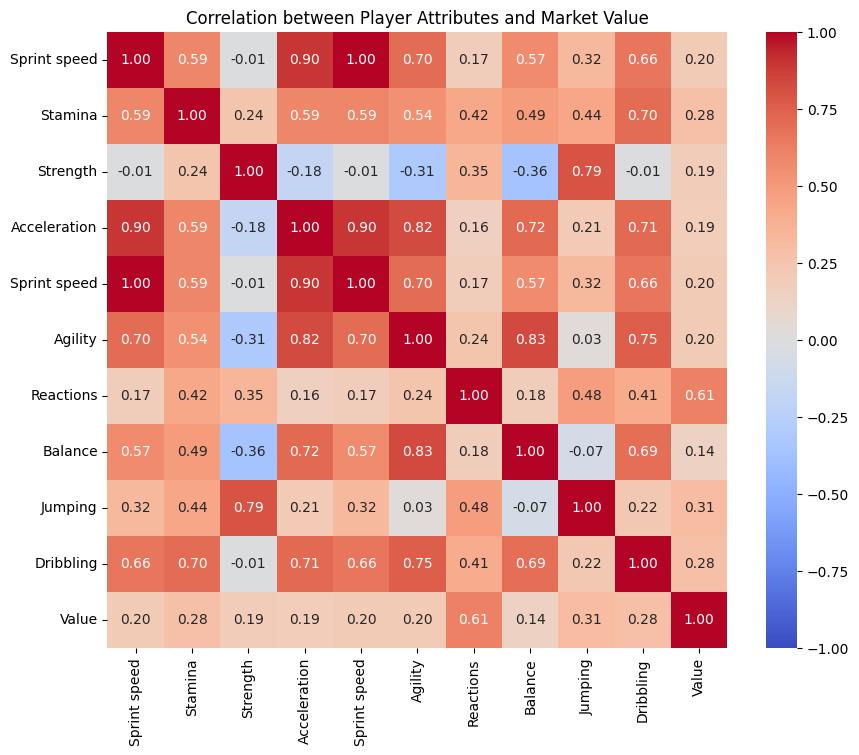

In [153]:
attributes = ['Sprint speed', 'Stamina', 'Strength', 'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance', 'Jumping', 'Dribbling']
corr_matrix = df[attributes + ['Value']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation between Player Attributes and Market Value")
plt.show()

In [156]:
top_correlated_attributes = ['Sprint speed', 'Acceleration', 'Dribbling', 'Reactions', 'Strength']

for attr in top_correlated_attributes:
    fig = px.scatter(df, x=attr, y='Value', 
                     title=f"{attr} vs Market Value",
                     labels={attr: f'{attr}', 'Value': 'Market Value (€)'},
                     color=attr, color_continuous_scale='Viridis')
    fig.show()


Player with higher dribbling and higher reaction tend to have more market value

### does **international reputation (1-5 stars) impact market value**?

In [157]:
fig = px.box(df, x='International reputation', y='Value',
             title="Market Value Distribution by International Reputation",
             labels={'International reputation': 'International Reputation (Stars)', 'Value': 'Market Value (€)'},
             color='International reputation', points='all')

fig.show()


players with higher reputation tend to have higher market values, and if there are any outliers.

### how do **potential ratings** compare to market value (are high-potential players priced higher)?

In [160]:
fig = px.scatter(df, x='Potential', y='Value',
                 title="Potential Rating vs Market Value",
                 labels={'Potential': 'Potential Rating', 'Value': 'Market Value (€)'},
                 color='Potential')

fig.show()

Generally, players with higher potential ratings tend to have higher market values, especially if they're young and have room for development. However, this may not always hold true if their current performance does not align with their potential.

### do **physical attributes (height, weight, strength) play a role in market value**?

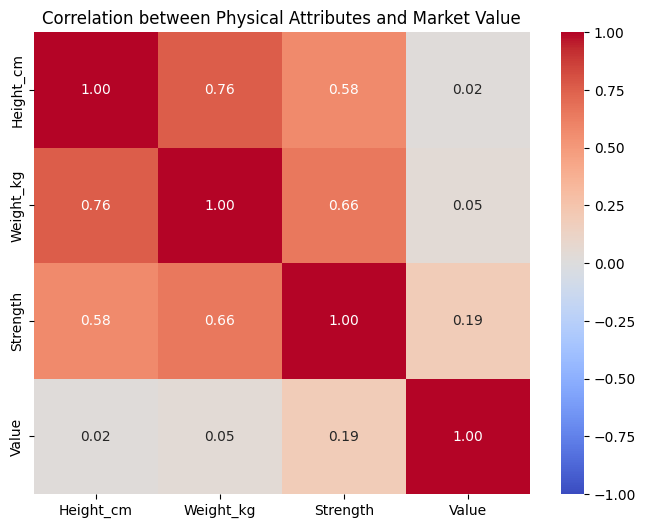

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

physical_attributes = ['Height_cm', 'Weight_kg', 'Strength']
corr_matrix = df[physical_attributes + ['Value']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation between Physical Attributes and Market Value")
plt.show()


In [162]:
import plotly.express as px

physical_attributes = ['Height_cm', 'Weight_kg', 'Strength']

for attr in physical_attributes:
    fig = px.scatter(df, x=attr, y='Value', 
                     title=f"{attr} vs Market Value",
                     labels={attr: f'{attr}', 'Value': 'Market Value (€)'},
                     color=attr, color_continuous_scale='Viridis')
    fig.show()


# **position-specific insights**


### are **attacking midfielders (CAM/CM) more valuable than defensive midfielders (CDM/CM)?**

In [ ]:
import plotly.express as px

midfielders = df[df['Best position'].isin(['CAM', 'CM', 'CDM'])]

fig = px.violin(midfielders, x='Best position', y='Value', box=True, points="all",
                title="Market Value Distribution: CAM/CM vs CDM",
                labels={'Best position': 'Midfield Position', 'Value': 'Market Value (€)'},
                color='Best position')

fig.show()


CDMs generally have lower market values, but elite defensive midfielders may still command high prices.

### how does **pace affect wingers' (LW/RW) market value**?

In [ ]:
wingers = df[df['Best position'].isin(['LW', 'RW'])]

fig = px.scatter(wingers, x='Pace / Diving', y='Value', 
                 title="Pace vs Market Value for Wingers (LW/RW)",
                 labels={'Pace / Diving': 'Pace Rating', 'Value': 'Market Value (€)'},
                 color='Pace / Diving', color_continuous_scale='Viridis',
                 trendline="ols") 

fig.show()

### do goalkeepers follow the same market trends as outfield players?

In [175]:
fig = px.violin(df, x='Position Type', y='Value', box=True, points="all",
                title="Market Value Spread: Goalkeepers vs Outfield Players",
                labels={'Position Type': 'Player Type', 'Value': 'Market Value (€)'},
                color='Position Type')

fig.show()


overall, outfield players command higher market values, while only a few elite goalkeepers reach top-tier valuations.

# **contract & transfer market impact**

### does a player's **contract end year affect their market value** (e.g., do players with 1 year left have lower values)?

In [176]:
fig = px.box(df, x='Contract End Year', y='Value',
             title="Market Value by Contract End Year",
             labels={'Contract End Year': 'Contract End Year', 'Value': 'Market Value (€)'},
             color='Contract End Year')

fig.show()


Players with shorter contract lengths (1 year left) often have lower market values because clubs risk losing them for free.
Longer contracts (3+ years) tend to keep market values high as clubs have more control over transfers.
Top players can still maintain high values regardless of contract length due to demand and reputation.

### are **players on loan priced differently** compared to permanent squad members?

In [179]:
import plotly.express as px

fig = px.violin(df, x='Value', y='On Loan', orientation='h', box=True, 
                title="Density of Market Values: Loan vs Permanent Players",
                labels={'On Loan': 'On Loan?', 'Value': 'Market Value (€)'},
                color='On Loan')

fig.show()


loaned players often have lower values, while permanent players have a wider spread, including high-value stars.

# Now i am going to analyze the talents like Lamine and Endrik for just fun purpose

In [198]:
players = ['Lamine Yamal', 'Endrick']
df[df['Name'].isin(players)]

Name      ID  Age Best position  Best overall  Overall rating  \
28   Lamine Yamal  277643   16           CAM            86              84   
293       Endrick  272505   17            ST            79              77   

     Potential  Growth  foot          Team       Value     Wage  \
28          94    10.0  Left  FC Barcelona  87000000.0  95000.0   
293         91    14.0  Left   Real Madrid  24000000.0  77000.0   

     Release clause  Height_cm  Weight_kg  Acceleration  Sprint speed  \
28      195800000.0        180         72            86            83   
293      64200000.0        173         66            91            88   

     Agility  Reactions  Balance  Stamina  Strength  Jumping  Total attacking  \
28      88.0         80     77.0       57        45     57.0              344   
293     86.0         77     78.0       67        72     85.0              334   

     Crossing  Finishing  Heading accuracy  Short passing  Volleys  \
28         83         80                33             83     65.0   
293        45         77                70             68     74.0   

     Total skill  Dribbling  Curve  FK Accuracy  Long passing  Ball control  \
28           394         87   83.0           65            73            86   
293          348         78   64.0           71            59            76   

     Total defending  Defensive awareness  Standing tackle  Sliding tackle  \
28                71                   23               20            28.0   
293               85                   24               30            31.0   

     Interceptions  Aggression  Total goalkeeping  GK Diving  GK Handling  \
28              18          45                 46          9           13   
293             20          40                 59          8            8   

     GK Kicking  GK Positioning  GK Reflexes  Total mentality  Att. Position  \
28          7.0              10            7              294             80   
293        15.0              15           13              268             76   

     Vision  Penalties  Composure  Total power  Shot power  Long shots  \
28     82.0       69.0       75.0          319          80          80   
293    64.0       68.0       74.0          377          79          74   

     Total stats  Base stats  International reputation  Pace / Diving  \
28          1882         400                         3             84   
293         1891         399                         1             89   

     Shooting / Handling  Passing / Kicking  Dribbling / Reflexes  \
28                    79                 80                    85   
293                   76                 61                    78   

     Defending / Pace  On Loan  Contract End Year  Log_Value    Position Type  
28                 23        0               2026  18.281419  Outfield Player  
293                30        0               2027  16.993564  Outfield Player

In [202]:
df_stars = df[df['Name'].isin(players)]

In [203]:

import plotly.express as px

attributes = ['Sprint speed', 'Dribbling', 'Long passing', 'Ball control', 'Total defending']
df_stars_renamed = dfj_stars.rename(columns={'Value': 'Market Value'})
df_melted = df_stars_renamed.melt(id_vars=['Name'], value_vars=attributes, var_name='Attribute', value_name='Value')

# Radar plot
fig = px.line_polar(df_melted, r='Value', theta='Attribute', color='Name',
                     title="Skill Breakdown of Future Stars", line_close=True)

fig.show()


In [205]:
import numpy as np

# Estimate future market value (simple linear projection)
df_stars['Future Value'] = df_stars['Value'] * (df_stars['Potential'] / df_stars['Overall rating'])

fig = px.bar(df_stars, x='Name', y=['Value', 'Future Value'], barmode='group',
             title="Current vs Projected Future Market Value",
             labels={'value': 'Market Value (€)', 'variable': 'Stage'},
             color_discrete_map={'Value': 'blue', 'Future Value': 'red'})

fig.show()


Conclusion: In today's EDA, we focused on players' market value rather than finding the best talents and their potential. We analyzed the distribution of market value, the correlation between different attributes and market value, average market value by position and team, and market value distribution by international reputation. Additionally, we examined the correlation between physical attributes and market value, market value distribution for different positions, and the market value distribution for loan and permanent players. We also explored the skill breakdown of future stars, the potential rating vs. age for future stars, and estimated the future market value of these stars.

That's it for today, Wonderful 6 hours of my life !!!! GoodBye